imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


dataset


In [ ]:
iris=load_iris(as_frame=True)
X=iris.data
Y=iris.target
feature_names=iris.feature_names
class_names=iris.target_names

train/test split


In [ ]:
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.2,random_state=7,stratify=Y);

cart classifier


In [ ]:
clf=DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    random_state=42
)

train the model


In [ ]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

test

In [ ]:
Y_pre=clf.predict(X_test)

model evaluation


In [ ]:
print("accuracy:",accuracy_score(Y_test,Y_pre))
print("Classification Report:",classification_report(Y_test,Y_pre,target_names=class_names))
print("Confusion matrix:",confusion_matrix(Y_test,Y_pre))

accuracy: 0.9416666666666667
Classification Report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.85      0.91        40
   virginica       0.87      0.97      0.92        40

    accuracy                           0.94       120
   macro avg       0.95      0.94      0.94       120
weighted avg       0.95      0.94      0.94       120

Confusion matrix: [[40  0  0]
 [ 0 34  6]
 [ 0  1 39]]


sample predictions


In [ ]:
sample = X_test.head(5).copy()

sample_pred = clf.predict(sample)

sample_display = sample.copy()
sample_display["Actual"] = [class_names[i] for i in Y_test.iloc[:5]]
sample_display["Predicted"] = [class_names[i] for i in sample_pred]

print("\nSample Predictions (first 5 test rows):\n", sample_display)



Sample Predictions (first 5 test rows):
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
130                7.4               2.8                6.1               1.9   
21                 5.1               3.7                1.5               0.4   
117                7.7               3.8                6.7               2.2   
140                6.7               3.1                5.6               2.4   
100                6.3               3.3                6.0               2.5   

        Actual  Predicted  
130  virginica  virginica  
21      setosa     setosa  
117  virginica  virginica  
140  virginica  virginica  
100  virginica  virginica  


visualizations

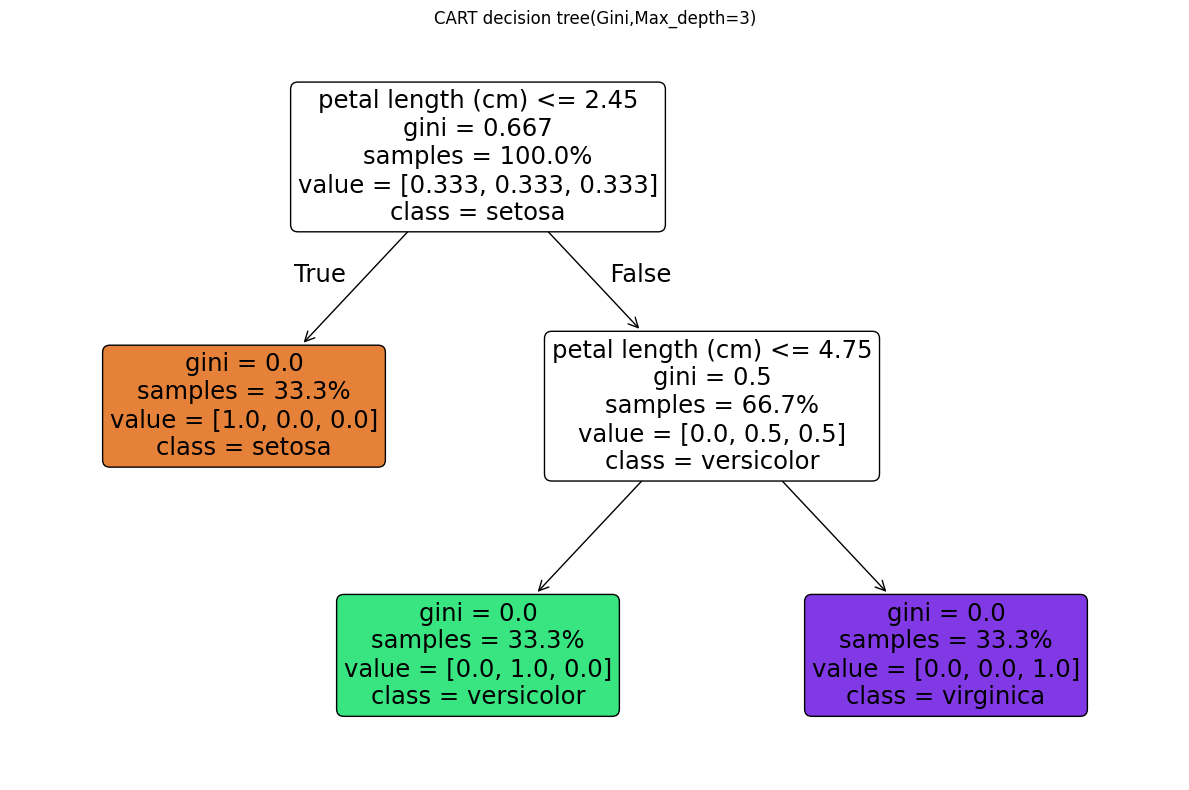

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    proportion=True,
    rounded=True,
    impurity=True
)
plt.title("CART decision tree(Gini,Max_depth=3)")
plt.tight_layout()
plt.show()

Feature importance vis


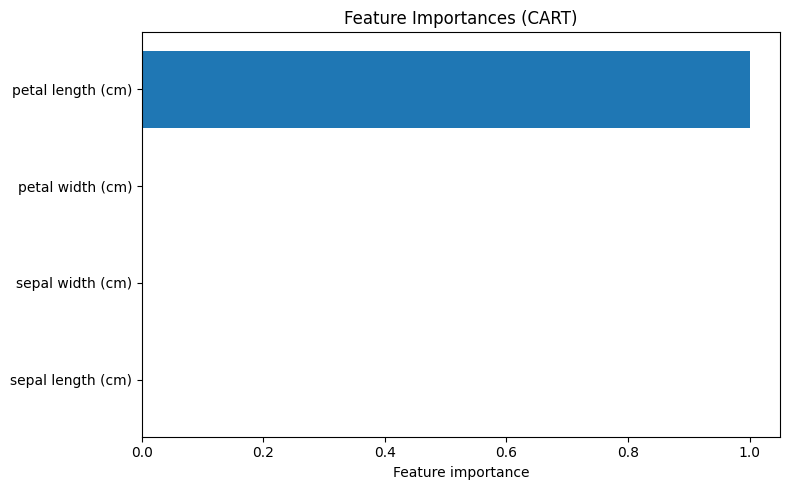

In [ ]:
plt.figure(figsize=(8, 5))
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), np.array(feature_names)[indices])
plt.xlabel("Feature importance")
plt.title("Feature Importances (CART)")
plt.tight_layout()
plt.show()